In [6]:
import os
os.chdir('/home/gsalinas/Documents/GitHub/axionns/')

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scripts.basic_functions import mag_vector, numbers_times_vectors

from classes.ns import NeutronStar
from classes.particles import Particles

# plt.rcParams['figure.figsize'] = [12, 8]

In [7]:
M_NS, R_NS = 1, 10
NS = NeutronStar(M_NS, R_NS, misalign=np.pi/4)

xmin, xmax, zmin, zmax, npoints = -100, 100, -100, 100, 30
xrange, zrange = np.linspace(xmin, xmax, npoints), np.linspace(zmin, zmax, npoints)

mesh = np.array(np.meshgrid(xrange, zrange))
positions2d = mesh.T.reshape(-1, 2)
positions3d = np.array([np.concatenate((np.array([position[0]]), np.array([0]), np.array([position[1]]))) for position in positions2d])

time = .25

Bfields3d = NS.magnetic_field(positions3d, time)
Bfields2d = np.array([[Bfield[0], Bfield[2]] for Bfield in Bfields3d])
Bdirecs = numbers_times_vectors(1/mag_vector(Bfields2d), Bfields2d)

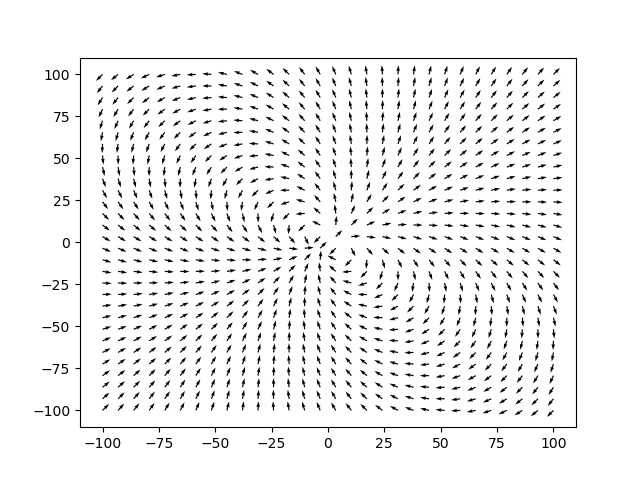

In [8]:
X, Y = positions2d.T
U, V = Bdirecs.T
q = plt.quiver(X, Y, U, V)

In [9]:
XX, YY, ZZ = NS.conversion_surface_est(time, Particles.axionmass).T

marker_data = go.Scatter3d(
    x=XX, 
    y=YY, 
    z=ZZ, 
    marker=go.scatter3d.Marker(size=3), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.show()

In [13]:
NS.conversion_radius_max(Particles.axionmass)

46.02263235182244

In [14]:
np.max(mag_vector(NS.conversion_surface_est(time, Particles.axionmass)))

44.86912415902008

In [ ]:
position = [0, 0, 200]
NS.conversion_radius_est(position, time, Particles.axionmass)

41.0015041676828

In [ ]:
velocity = [0,0, -1e5]
NS.conversion_radius_exact(position, velocity, time, Particles.axionmass)

39.87616411146171